In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [22]:
import requests
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | abu samrah
Processing Record 9 of Set 1 | arlit
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | penzance
Processing Record 12 of Set 1 | santa eulalia del rio
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | asyut
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | manokwari
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | rawson
Processing

Processing Record 38 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 39 of Set 4 | klaksvik
Processing Record 40 of Set 4 | muros
Processing Record 41 of Set 4 | nicoya
Processing Record 42 of Set 4 | akyab
Processing Record 43 of Set 4 | sambava
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | kavaratti
Processing Record 46 of Set 4 | sarai naurang
Processing Record 47 of Set 4 | lunino
Processing Record 48 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 49 of Set 4 | vestmannaeyjar
Processing Record 50 of Set 4 | belmonte
Processing Record 1 of Set 5 | taksimo
Processing Record 2 of Set 5 | atar
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | antigonish
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | harper
Processing Record 7 of Set 5 | sinnamary
Processing Record 8 of Set 5 | miyako
Processing Record 9 of Set 5 | nanakuli
Processing Record 10 of Set 5 | merrill
Processing 

Processing Record 32 of Set 8 | eatonton
Processing Record 33 of Set 8 | vardo
Processing Record 34 of Set 8 | saint-augustin
Processing Record 35 of Set 8 | victor harbor
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | loding
Processing Record 38 of Set 8 | luanda
Processing Record 39 of Set 8 | ye
City not found. Skipping...
Processing Record 40 of Set 8 | damaturu
Processing Record 41 of Set 8 | puerto gaitan
Processing Record 42 of Set 8 | roald
Processing Record 43 of Set 8 | henties bay
Processing Record 44 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 45 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 8 | cruzeiro do sul
Processing Record 47 of Set 8 | san juan
Processing Record 48 of Set 8 | baghdad
Processing Record 49 of Set 8 | sechura
Processing Record 50 of Set 8 | aanekoski
Processing Record 1 of Set 9 | bongandanga
Processing Record 2 of Set 9 | palabuhanratu
City not found. Skip

Processing Record 17 of Set 12 | shingu
Processing Record 18 of Set 12 | srednekolymsk
Processing Record 19 of Set 12 | yaring
Processing Record 20 of Set 12 | komsomolets
Processing Record 21 of Set 12 | uvalde
Processing Record 22 of Set 12 | santa cruz
Processing Record 23 of Set 12 | kjollefjord
Processing Record 24 of Set 12 | libano
Processing Record 25 of Set 12 | bartica
Processing Record 26 of Set 12 | chippewa falls
Processing Record 27 of Set 12 | kirkcudbright
Processing Record 28 of Set 12 | khormuj
City not found. Skipping...
Processing Record 29 of Set 12 | mudgee
Processing Record 30 of Set 12 | novikovo
Processing Record 31 of Set 12 | wasaga beach
Processing Record 32 of Set 12 | shuiji
Processing Record 33 of Set 12 | clovis
Processing Record 34 of Set 12 | brumado
Processing Record 35 of Set 12 | salisbury
Processing Record 36 of Set 12 | zorritos
Processing Record 37 of Set 12 | hovd
Processing Record 38 of Set 12 | salalah
Processing Record 39 of Set 12 | bonavist

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.29,114.16,66.99,69,67,7.96,HK,2020-12-08 18:43:56
1,Busselton,-33.65,115.33,62.01,86,5,3.00,AU,2020-12-08 18:46:16
2,Albany,42.60,-73.97,28.00,73,90,13.87,US,2020-12-08 18:41:57
3,Mar Del Plata,-38.00,-57.56,75.00,69,75,16.11,AR,2020-12-08 18:44:33
4,Faanui,-16.48,-151.75,79.84,76,100,19.08,PF,2020-12-08 18:46:16
5,Kapaa,22.08,-159.32,78.80,78,75,12.75,US,2020-12-08 18:46:17
6,Ribeira Grande,38.52,-28.70,62.60,72,40,16.11,PT,2020-12-08 18:46:17
7,Abu Samrah,35.30,37.18,56.48,64,99,3.18,SY,2020-12-08 18:46:17
8,Arlit,18.74,7.39,82.92,15,0,10.29,NE,2020-12-08 18:46:17
9,Jamestown,42.10,-79.24,33.01,74,75,21.92,US,2020-12-08 18:42:17


In [24]:
new_column_order=['City', 'Country', 'Date', 'Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [25]:
city_data_df=city_data_df[new_column_order]

In [26]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2020-12-08 18:43:56,22.29,114.16,66.99,69,67,7.96
1,Busselton,AU,2020-12-08 18:46:16,-33.65,115.33,62.01,86,5,3.00
2,Albany,US,2020-12-08 18:41:57,42.60,-73.97,28.00,73,90,13.87
3,Mar Del Plata,AR,2020-12-08 18:44:33,-38.00,-57.56,75.00,69,75,16.11
4,Faanui,PF,2020-12-08 18:46:16,-16.48,-151.75,79.84,76,100,19.08


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

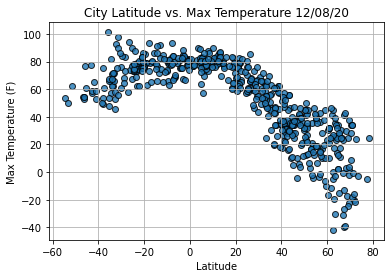

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

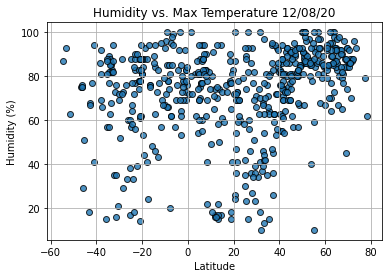

In [36]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Humidity vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

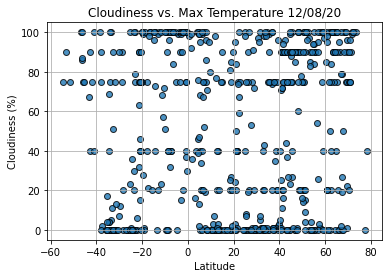

In [37]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Cloudiness vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

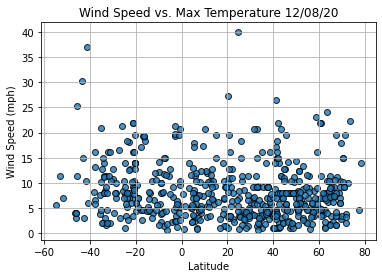

In [38]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Wind Speed vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()